In [226]:
cd /orange/adamginsburg/ALMA_IMF/w51efield12/field12_tests/

/orange/adamginsburg/ALMA_IMF/w51efield12/field12_tests


In [227]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')

In [228]:
from casa_notebook_tools.showimage import showimage

In [229]:
!ls -d *image.tt0

Field12_W51E_test_standard_smallpix_robust0_allchan_selfcal.image.tt0
Field12_W51E_test_standard_smallpix_robust0_selectedchan_selfcal.image.tt0


In [230]:
import glob
import os
from astropy import stats
from casatools import image
ia = image()

In [231]:
for fn in glob.glob("/orange/adamginsburg/ALMA_IMF/w51efield12/field12_tests/Field12*.residual.tt0"):
    ia.open(fn)
    img = ia.getchunk()
    rms = np.nanstd(img) # residual has bad header units
    peak = np.nanmax(img)
    rms2 = stats.mad_std(img, ignore_nan=True)
    beam = ia.restoringbeam()
    print(f"peak/mad={peak/rms2:6.1f}, peak={peak:0.3f}, rms={rms:0.5f}, mad={rms2:0.5f} name={os.path.basename(fn)}")
          #f" beam={beam.major.value:0.2f}x{beam.minor.value:0.2f}")
    ia.close()

peak/mad=   5.6, peak=0.009, rms=0.00162, mad=0.00161 name=Field12_W51E_test_standard_smallpix_robust0_allchan_selfcal.residual.tt0
peak/mad=   4.8, peak=0.010, rms=0.00203, mad=0.00207 name=Field12_W51E_test_standard_smallpix_robust0_selectedchan_selfcal.residual.tt0


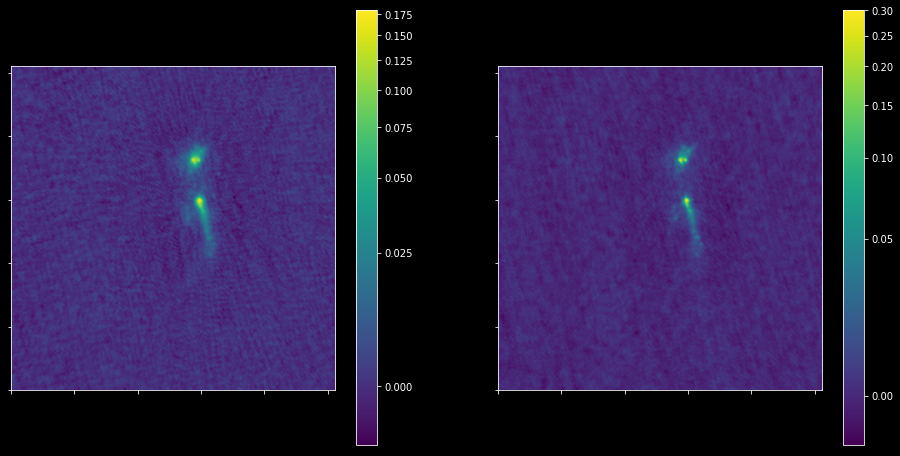

In [232]:
pl.figure(figsize=(16,8))
pl.subplot(1,2,1)
showimage('Field12_W51E_test_standard_smallpix_robust0_allchan_selfcal.image.tt0')
pl.subplot(1,2,2)
showimage('Field12_W51E_test_standard_smallpix_robust0_selectedchan_selfcal.image.tt0')

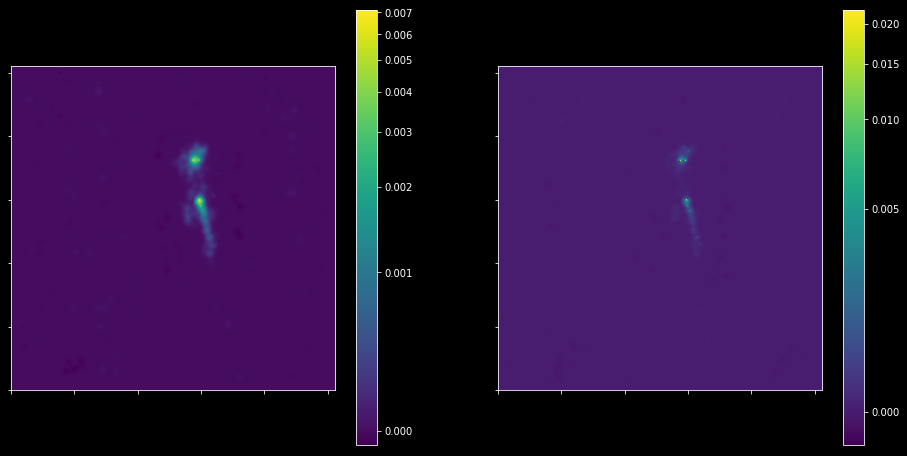

In [233]:
pl.figure(figsize=(16,8))
pl.subplot(1,2,1)
showimage('Field12_W51E_test_standard_smallpix_robust0_allchan_selfcal.model.tt0')
pl.subplot(1,2,2)
showimage('Field12_W51E_test_standard_smallpix_robust0_selectedchan_selfcal.model.tt0')

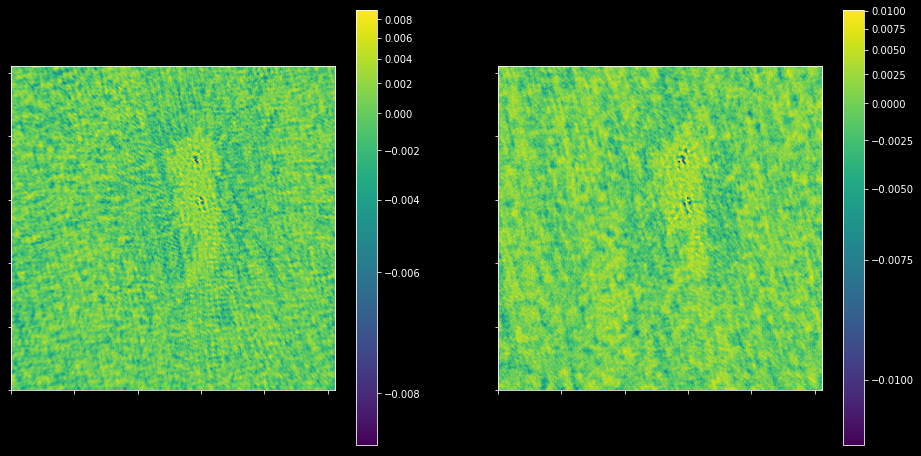

In [234]:
pl.figure(figsize=(16,8))
pl.subplot(1,2,1)
showimage('Field12_W51E_test_standard_smallpix_robust0_allchan_selfcal.residual.tt0')
pl.subplot(1,2,2)
showimage('Field12_W51E_test_standard_smallpix_robust0_selectedchan_selfcal.residual.tt0')

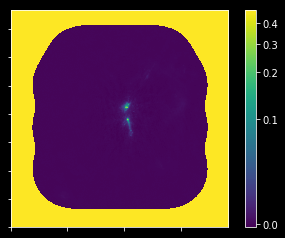

In [235]:
showimage('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal7.image.tt0.fits')

!ls

In [236]:
cd /orange/adamginsburg/ALMA_IMF/w51efield12

/orange/adamginsburg/ALMA_IMF/w51efield12


In [301]:
from casatools import ms
ms = ms()

In [302]:
ms.open('uid___A002_Xcf0c6b_X4bbc.ms.split.cal.field12/')
ms.selectinit(reset=True)

True

In [303]:
uvw = (ms.getdata(['uvw'])['uvw'])
uvw.shape

(3, 16215)

ms.getdata?

"""
Allowable items include: 'amplitude',
'corrected_amplitude', 'model_amplitude', 'ratio_amplitude',
'residual_amplitude', 'obs_residual_amplitude', 'antenna1',
'antenna2', 'axis_info', 'data', 'corrected_data', 'float_data',
'model_data', 'ratio_data', 'residual_data',
'obs_residual_data', 'feed1', 'feed2', 'field_id', 'flag',
'flag_row', 'flag_sum', 'ha' (added to 'axis_info'),
'ifr_number', 'imaginary', 'corrected_imaginary',
'model_imaginary', 'ratio_imaginary', 'residual_imaginary',
'obs_residual_imaginary', 'last' (added to 'axis_info'),
'phase', 'corrected_phase', 'model_phase', 'ratio_phase',
'residual_phase', 'obs_residual_phase', 'real',
'corrected_real', 'ratio_real', 'residual_real',
'obs_residual_real', 'scan_number', 'sigma', 'data_desc_id',
'time', 'ut' (added to 'axis_info'), 'uvw', 'u', 'v', 'w',
'uvdist', and 'weight'.
"""

#### dat = ms.getdata(['model_data', 'data', 'flag', 'corrected_data', 'time', 'antenna1', 'antenna2', 'axis_info', 'uvdist', 'weight', 'scan_number'])

In [305]:
dat.keys()

dict_keys(['antenna1', 'antenna2', 'axis_info', 'corrected_data', 'data', 'flag', 'model_data', 'scan_number', 'time', 'uvdist', 'weight'])

In [306]:
ms.close()

True

In [307]:
dat['axis_info']

{'corr_axis': array(['XX', 'YY'], dtype='<U16'),
 'freq_axis': {'chan_freq': array([[2.16296519e+11],
         [2.16296397e+11],
         [2.16296275e+11],
         ...,
         [2.16062510e+11],
         [2.16062388e+11],
         [2.16062266e+11]]), 'resolution': array([[244140.625],
         [244140.625],
         [244140.625],
         ...,
         [244140.625],
         [244140.625],
         [244140.625]])}}

In [308]:
dat['data'].shape, dat['corrected_data'].shape, dat['model_data'].shape, dat['time'].shape, dat['flag'].shape

((2, 1920, 16215), (2, 1920, 16215), (0,), (16215,), (2, 1920, 16215))

In [245]:
autocorrs = dat['antenna1'] == dat['antenna2']

In [246]:
autocorrs.shape

(16215,)

/apps/python3/3.6.5/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


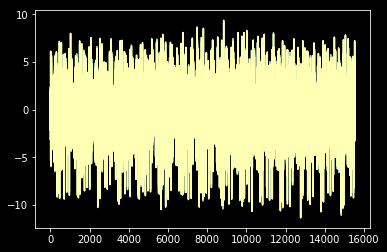

In [247]:
pl.plot(dat['data'].mean(axis=1).T[~autocorrs])

/apps/python3/3.6.5/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


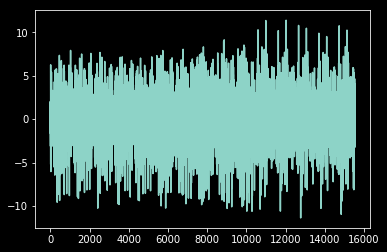

In [248]:
pl.plot(dat['corrected_data'].mean(axis=(0,1))[~autocorrs])
#pl.plot(dat['model_data'].mean(axis=(0,1)))

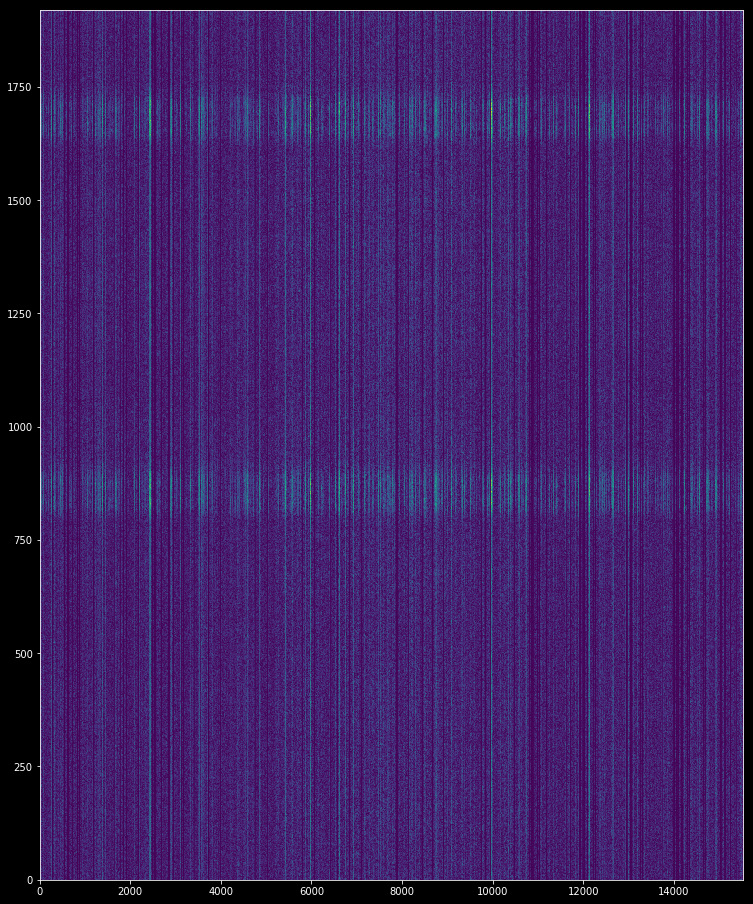

In [249]:
pl.figure(figsize=(16,16))
pl.imshow(np.abs(dat['corrected_data'][0,:,~autocorrs]).T, origin='lower', interpolation='none')
pl.gca().set_aspect(10)

/apps/python3/3.6.5/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


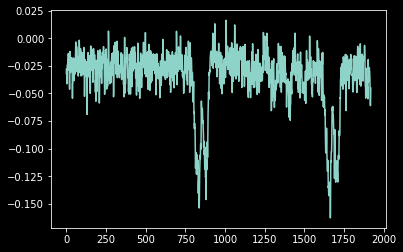

In [250]:
pl.plot(dat['corrected_data'][:,:,~autocorrs].mean(axis=(0,2)))

In [252]:
meanspec = dat['corrected_data'][:,:,~autocorrs].mean(axis=(0,2))

In [253]:
mask = meanspec > -0.075

In [254]:
meanspec_masked = meanspec.copy()
meanspec_masked[~mask] = np.nan

/apps/python3/3.6.5/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


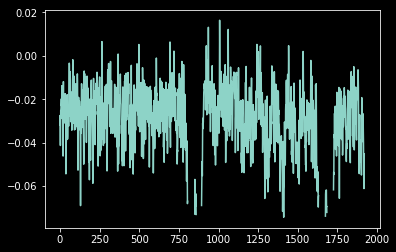

In [255]:
pl.plot(meanspec_masked)

In [256]:
import scipy.ndimage

scipy.ndimage.find_objects?

In [257]:
labels,nlabels = scipy.ndimage.label(mask)

In [258]:
slices = scipy.ndimage.find_objects(labels)

/apps/python3/3.6.5/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


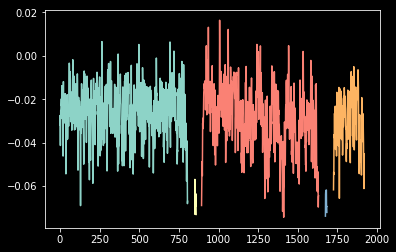

In [259]:
inds = np.arange(len(meanspec))
for slc in slices:
    pl.plot(inds[slc], meanspec[slc])

In [260]:
slices

[(slice(0, 806, None),),
 (slice(850, 860, None),),
 (slice(861, 862, None),),
 (slice(893, 1632, None),),
 (slice(1674, 1684, None),),
 (slice(1725, 1920, None),)]

In [261]:
goodslices = slice(0,806), slice(893,1632), slice(1725,1920)

In [262]:
meanamp = np.abs(dat['corrected_data'][:,np.r_[goodslices],:]).mean(axis=(0,1))

Text(0,0.5,'Amplitude')

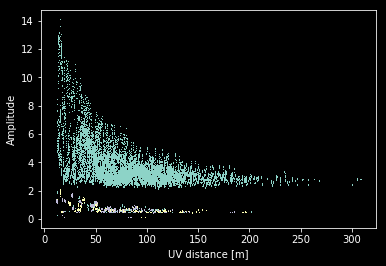

In [286]:
pl.plot(dat['uvdist'][~autocorrs], meanamp[~autocorrs], ',')
ant27mask = (dat['antenna1'] == 27) | (dat['antenna2'] == 27)
pl.plot(dat['uvdist'][ant27mask & ~autocorrs], meanamp[ant27mask & ~autocorrs], ',')
ant16mask = (dat['antenna1'] == 16) | (dat['antenna2'] == 16)
pl.plot(dat['uvdist'][ant16mask & ~autocorrs], meanamp[ant16mask & ~autocorrs], ',')

pl.xlabel("UV distance [m]")
pl.ylabel("Amplitude")

Text(0,0.5,'Amplitude')

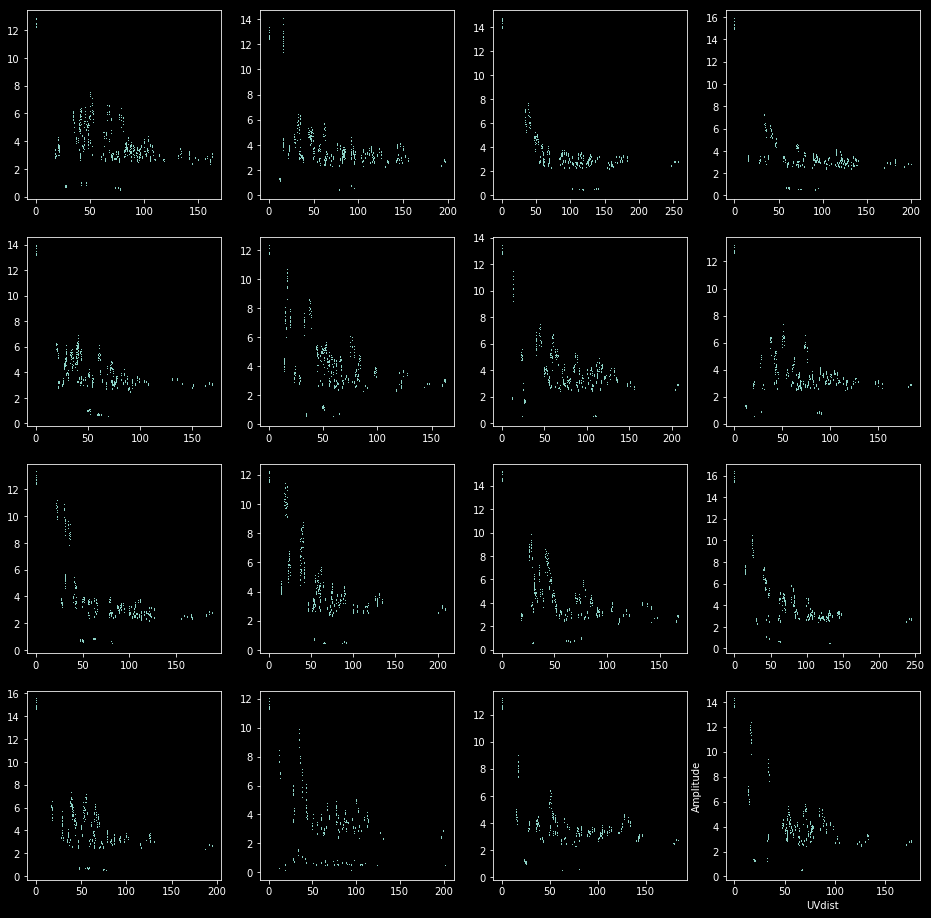

In [283]:
pl.figure(figsize=(16,16))
for ant1 in np.unique(dat['antenna1'])[:16]:
    antmask = dat['antenna1'] == ant1
    pl.subplot(4,4,ant1+1)
    pl.plot(dat['uvdist'][antmask], meanamp[antmask], ',')
pl.xlabel("UVdist")
pl.ylabel("Amplitude")

Text(0,0.5,'Amplitude')

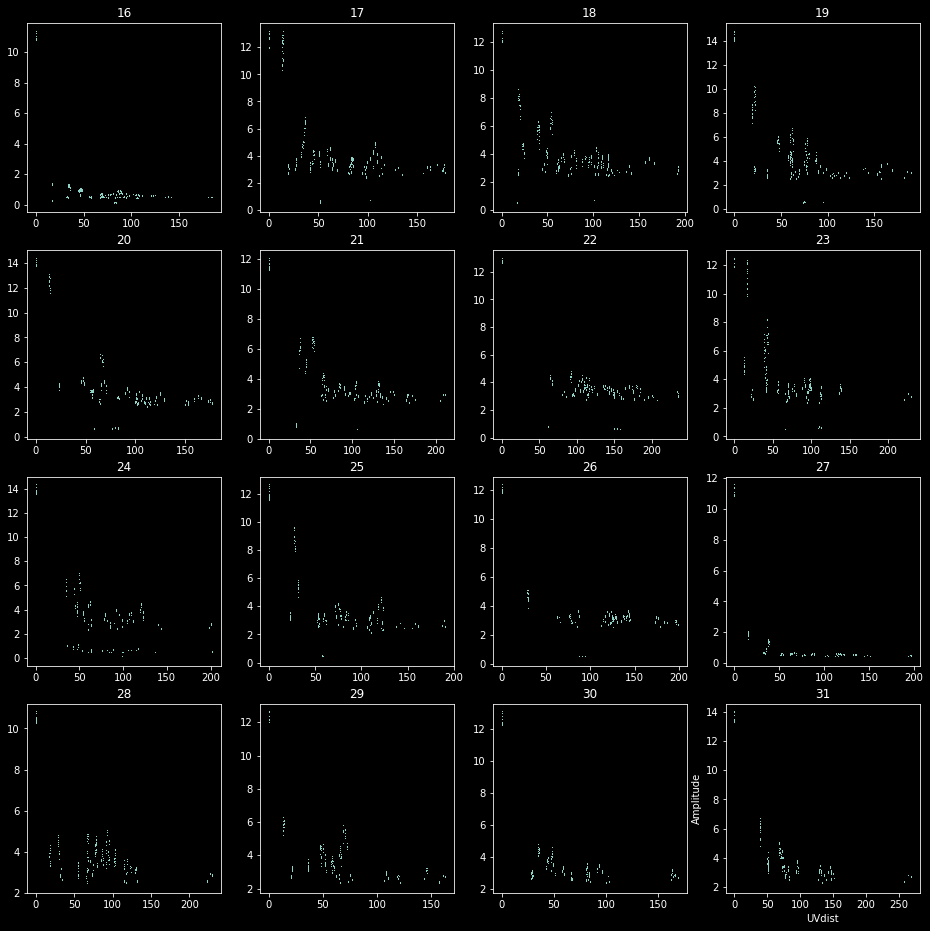

In [284]:
pl.figure(figsize=(16,16))
for ant1 in np.unique(dat['antenna1'])[16:32]:
    antmask = dat['antenna1'] == ant1
    pl.subplot(4,4,ant1+1-16)
    pl.title(str(ant1))
    pl.plot(dat['uvdist'][antmask], meanamp[antmask], ',')
pl.xlabel("UVdist")
pl.ylabel("Amplitude")

Text(0,0.5,'Amplitude')

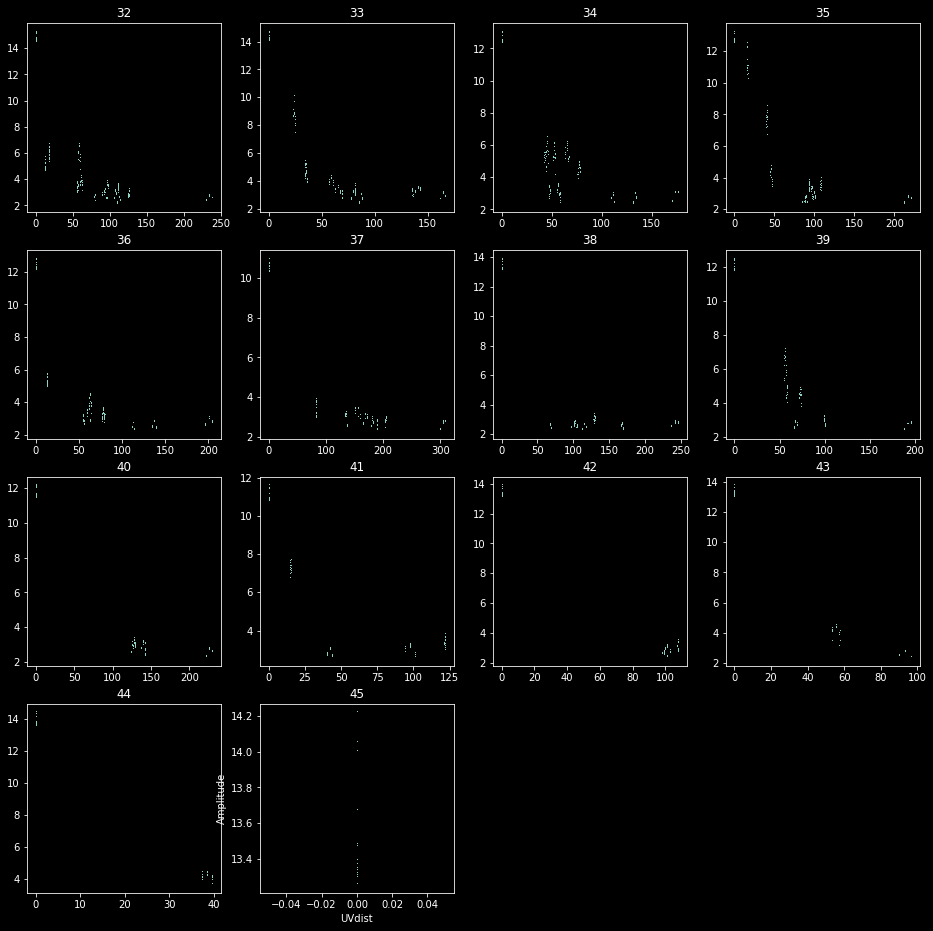

In [287]:
pl.figure(figsize=(16,16))
for ant1 in np.unique(dat['antenna1'])[32:48]:
    antmask = dat['antenna1'] == ant1
    pl.subplot(4,4,ant1+1-32)
    pl.title(str(ant1))
    pl.plot(dat['uvdist'][antmask], meanamp[antmask], ',')
pl.xlabel("UVdist")
pl.ylabel("Amplitude")

Text(0,0.5,'Amplitude')

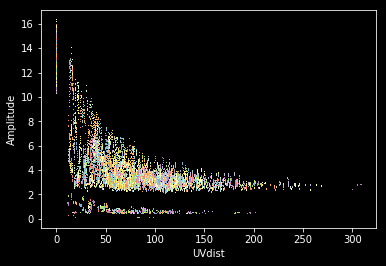

In [264]:
for ant1 in np.unique(dat['antenna1']):
    antmask = dat['antenna1'] == ant1
    pl.plot(dat['uvdist'][antmask], meanamp[antmask], ',')
pl.xlabel("UVdist")
pl.ylabel("Amplitude")

Text(0,0.5,'Amplitude')

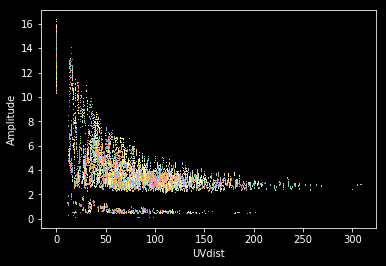

In [265]:
for ant2 in np.unique(dat['antenna2']):
    antmask = dat['antenna2'] == ant2
    pl.plot(dat['uvdist'][antmask], meanamp[antmask], ',')
pl.xlabel("UVdist")
pl.ylabel("Amplitude")

In [266]:
low = (meanamp < 2) & (~autocorrs)

In [271]:
meanspec_low = dat['corrected_data'][:,:,low & ~autocorrs].mean(axis=(0,2))
meanspec_high = dat['corrected_data'][:,:,~low & ~autocorrs].mean(axis=(0,2))

/apps/python3/3.6.5/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


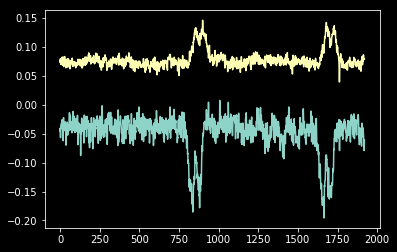

In [273]:
pl.plot(meanspec_high)
pl.plot(meanspec_low)
#pl.plot(meanspec)

In [ ]:
np.unique(dat['antenna1'][low]),np.unique(dat['antenna2'][low])

In [ ]:
dat['weight'].shape

In [ ]:

#pl.hist(dat['weight'][0,:],bins=50)
#pl.hist(dat['weight'][0,low],bins=50)
pl.plot(dat['uvdist'][~autocorrs], dat['weight'][0,~autocorrs], '.')
pl.plot(dat['uvdist'][low & ~autocorrs], dat['weight'][0,low & ~autocorrs], '.')

In [ ]:
pl.hist(dat['scan_number'],bins=50)
pl.hist(dat['scan_number'][low],bins=50)

In [ ]:
pl.hist(dat['time'],bins=50)
pl.hist(dat['time'][low],bins=50)

In [ ]:
inds = np.arange(len(dat['time']))
pl.plot(inds, dat['time'], '.')
pl.plot(inds[low], dat['time'][low], ',')

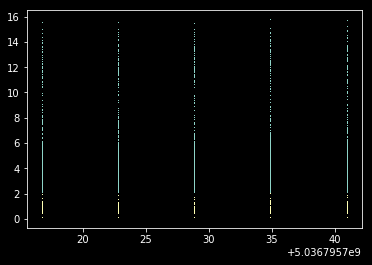

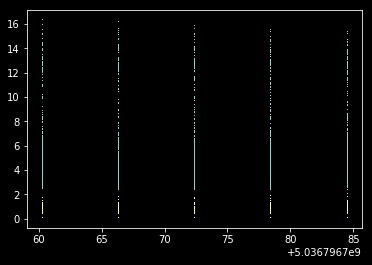

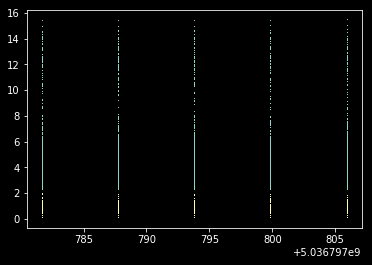

In [217]:
meanamp = np.abs(dat['corrected_data'][:,np.r_[goodslices],:]).mean(axis=(0,1))
autocorrs = dat['antenna1'] == dat['antenna2']
low = (meanamp < 2) & (~autocorrs)

for sn in np.unique(dat['scan_number']):
    pl.figure()
    scanmask = dat['scan_number']==sn
    pl.plot(dat['time'][scanmask], (meanamp[scanmask]), ',')
    pl.plot(dat['time'][scanmask & low], (meanamp[scanmask & low]), ',')


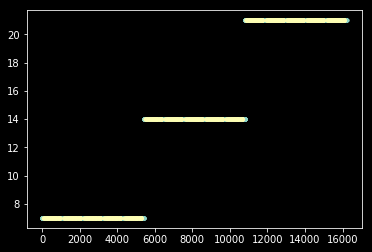

In [168]:
inds = np.arange(len(dat['scan_number']))
pl.plot(inds, dat['scan_number'], '.')
pl.plot(inds[low], dat['scan_number'][low], '.')

In [200]:
cd /orange/adamginsburg/ALMA_IMF/w51efield12

/orange/adamginsburg/ALMA_IMF/w51efield12


In [319]:
"""
Tools to enable plotms-like functionality
"""
import pylab as pl

from casatools import ms as mstool
ms = mstool()

def amp_vs_uvdist(msname, datacolumn='corrected_data', freqsel=slice(None),
                  data=None, weighted=False, flagthreshold=0.5):
    if data is None:
        ms.open(msname)
        ms.selectinit(reset=True)
        if weighted:
            data = ms.getdata(['model_data', 'data', 'corrected_data',
                              'uvdist', 'antenna1', 'antenna2', 'flag', 'weight'])
        else:
            data = ms.getdata(['model_data', 'data', 'corrected_data',
                              'uvdist', 'antenna1', 'antenna2', 'flag'])
        ms.close()

    autocorrs = data['antenna1'] == data['antenna2']

    if weighted:
        meanamp = np.abs(data[datacolumn][:,freqsel,:]).mean(axis=(0,1)) * data['weight'].mean(axis=0)
    else:
        meanamp = np.abs(data[datacolumn][:,freqsel,:]).mean(axis=(0,1))

    meanflag = data['flag'].mean(axis=(0,1))
    flagmask = meanflag > 0.5

    pl.plot(data['uvdist'][flagmask & ~autocorrs], meanamp[flagmask & ~autocorrs], 'r,')
    pl.plot(data['uvdist'][~flagmask & ~autocorrs], meanamp[~flagmask & ~autocorrs], ',')
    pl.xlabel("UV distance [m]")
    pl.ylabel("Amplitude")

def amp_vs_freq(msname, datacolumn='corrected_data', data=None):

    if data is None:
        ms.open(msname)
        ms.selectinit(reset=True)
        data = ms.getdata(['model_data', 'data', 'corrected_data',
                          'uvdist', 'antenna1', 'antenna2', 'flag'])
                          #'time', 'antenna1', 'antenna2',
                          #'axis_info', 'uvdist', 'weight', 'scan_number'])
        ms.close()

    autocorrs = data['antenna1'] == data['antenna2']

    spec = np.ma.array(data[datacolumn][:,:,~autocorrs],
                       mask=data['flag'][:,:,~autocorrs]).mean(axis=(0,2))

    pl.plot(spec)


In [310]:
mses = glob.glob("/orange/adamginsburg/ALMA_IMF/w51efield12/*.split.cal.field12")

/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xcf0c6b_X4bbc.ms.split.cal.field12


/apps/python3/3.6.5/lib/python3.6/site-packages/numpy/ma/core.py:2786: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xc96463_X6519.ms.split.cal.field12
/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xc96f17_X6e3d.ms.split.cal.field12


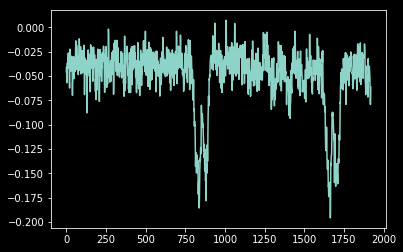

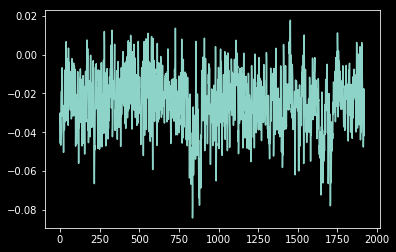

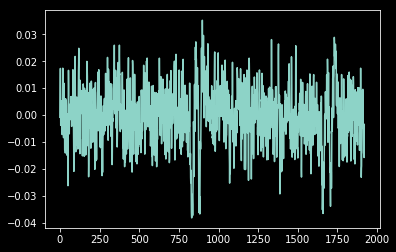

In [320]:
for msname in mses:
    pl.figure()
    print(msname)
    amp_vs_freq(msname)

/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xcf0c6b_X4bbc.ms.split.cal.field12
/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xc96463_X6519.ms.split.cal.field12
/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xc96f17_X6e3d.ms.split.cal.field12


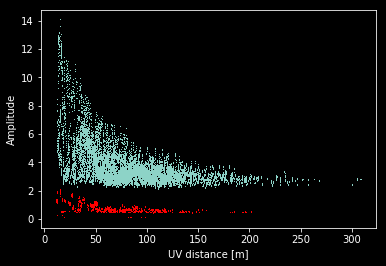

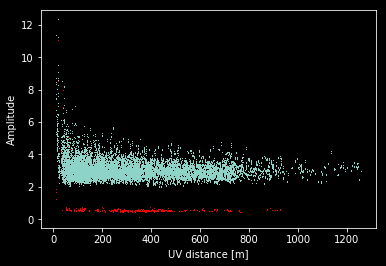

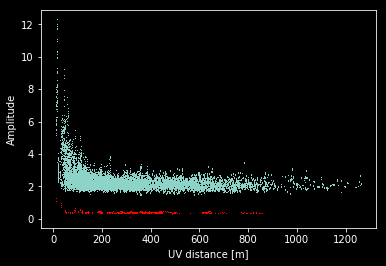

In [314]:
for msname in mses:
    pl.figure()
    print(msname)
    amp_vs_uvdist(msname, freqsel=np.r_[goodslices])

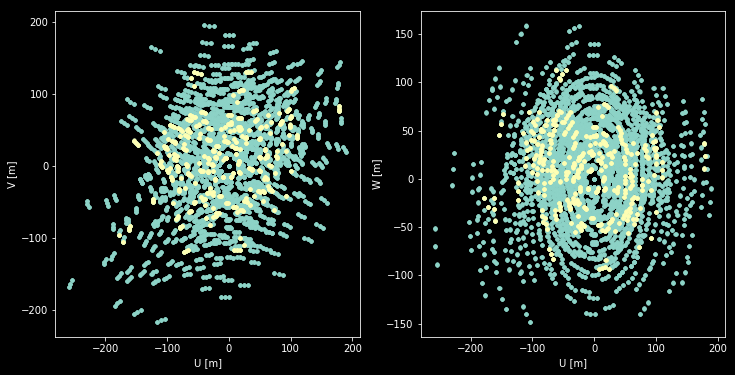

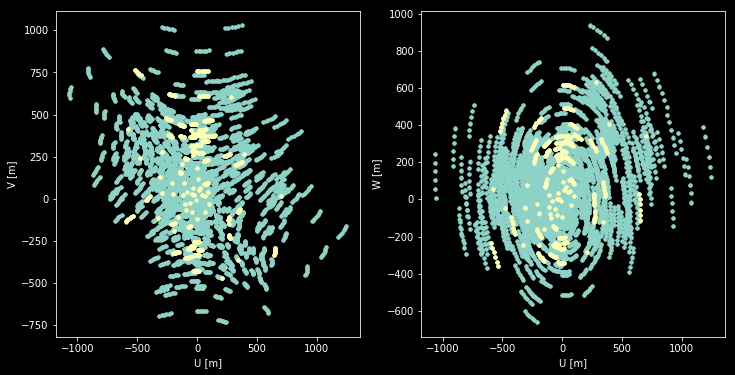

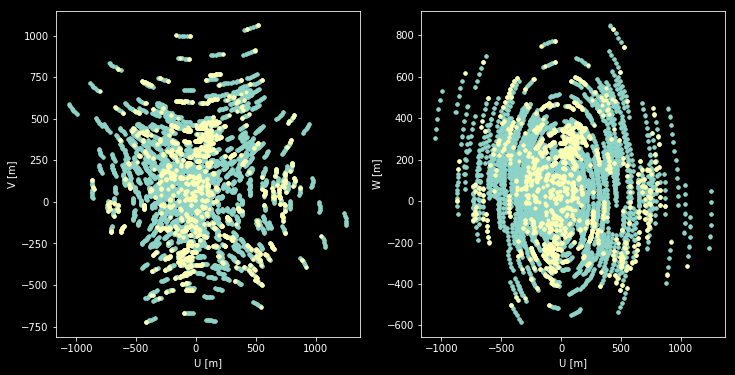

In [315]:
for msname in mses:
    datacolumn='corrected_data'
    ms.open(msname)
    ms.selectinit(reset=True)
    data = ms.getdata(['model_data', 'data', 'corrected_data',
                      'uvdist', 'antenna1', 'antenna2', 'uvw'])
                      #'time', 'antenna1', 'antenna2',
                      #'axis_info', 'uvdist', 'weight', 'scan_number'])
    ms.close()

    autocorrs = data['antenna1'] == data['antenna2']

    freqsel = np.r_[goodslices]
    
    meanamp = np.abs(data[datacolumn][:,freqsel,:]).mean(axis=(0,1))

    low = meanamp < 1.8
    
    pl.figure(figsize=(12,6))

    uvw = data['uvw']
    pl.subplot(1,2,1)
    pl.plot(uvw[0,:], uvw[1,:], '.')
    pl.plot(uvw[0,:][low], uvw[1,:][low], '.')
    pl.xlabel("U [m]")
    pl.ylabel("V [m]")
    pl.subplot(1,2,2)
    pl.plot(uvw[0,:], uvw[2,:], '.')
    pl.plot(uvw[0,:][low], uvw[2,:][low], '.')
    pl.xlabel("U [m]")
    pl.ylabel("W [m]")

/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xcf0c6b_X4bbc.ms.split.cal.field12
/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xc96463_X6519.ms.split.cal.field12
/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xc96f17_X6e3d.ms.split.cal.field12


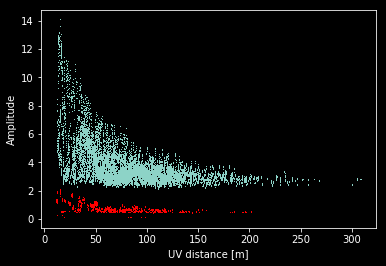

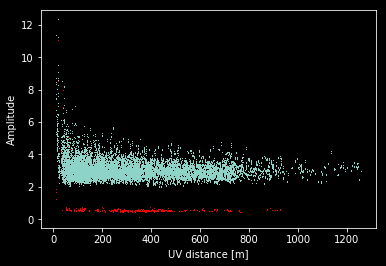

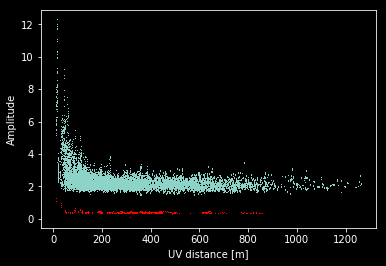

In [316]:
for msname in mses:
    pl.figure()
    print(msname)
    amp_vs_uvdist(msname, freqsel=np.r_[goodslices], datacolumn='data')

In [317]:
dat['weight'].shape

(2, 16215)

/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xcf0c6b_X4bbc.ms.split.cal.field12
/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xc96463_X6519.ms.split.cal.field12
/orange/adamginsburg/ALMA_IMF/w51efield12/uid___A002_Xc96f17_X6e3d.ms.split.cal.field12


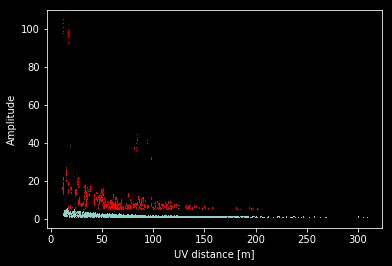

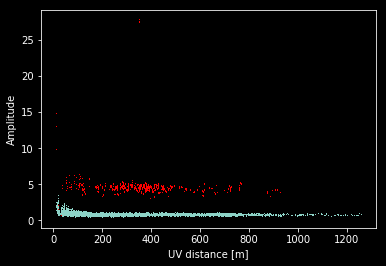

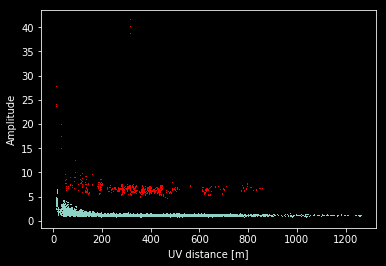

In [318]:
for msname in mses:
    pl.figure()
    print(msname)
    amp_vs_uvdist(msname, freqsel=np.r_[goodslices], datacolumn='data', weighted=True)